In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("../../data/Housing.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [ ]:
def extract(val):
  if val == 'semi-furnished':
    return 1
  elif val == 'unfurnished':
    return 0
  else:
    return 2

df['furnishingstatus'] = df['furnishingstatus'].apply(extract)


In [ ]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
1,227
0,178
2,140


In [ ]:
df['mainroad'] = np.where(df['mainroad'] == 'yes',1,0)

In [ ]:
df['guestroom'] = np.where(df['guestroom'] == 'yes',1,0)
df['basement'] = np.where(df['basement'] == 'yes',1,0)
df['hotwaterheating'] = np.where(df['hotwaterheating'] == 'yes',1,0)
df['airconditioning'] = np.where(df['airconditioning'] == 'yes',1,0)
df['prefarea'] = np.where(df['prefarea'] == 'yes',1,0)



In [ ]:
df.isna().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [ ]:
X,y = df.drop(['price'],axis = 1),df['price']
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state = 42,test_size=0.25)
reg = LinearRegression()

In [ ]:
X.head()

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2


In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mean_squared_error(y_test,y_pred)

1560062846482.4194

In [ ]:
r2_score(y_test,y_pred)

0.6614628548582817

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

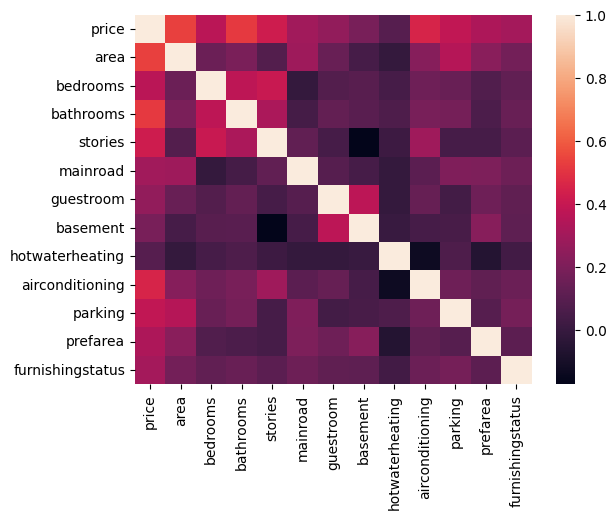

In [ ]:
import seaborn as sns
sns.heatmap(df.corr())